In [1]:
#Yahoo Finance API to get stock price history (NVIDIA in our case)
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#Initialize Ticker Class for price history
NVDA = yf.Ticker("NVDA")

In [3]:
#Query prices for each trading day
NVDA = NVDA.history(period="max")
NVDA

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-24 00:00:00-04:00,116.519997,121.800003,115.379997,120.870003,354966800,0.0,0.0
2024-09-25 00:00:00-04:00,122.019997,124.940002,121.610001,123.510002,284692900,0.0,0.0
2024-09-26 00:00:00-04:00,126.800003,127.669998,121.800003,124.040001,302582900,0.0,0.0


<Axes: xlabel='Date'>

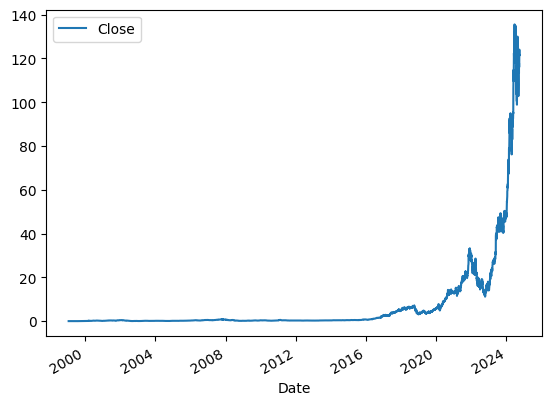

In [4]:
#Looking at the closing price of the stock over time.
NVDA.plot.line(y="Close", use_index=True)

In [5]:
del NVDA["Dividends"]
del NVDA["Stock Splits"]

In [6]:
#We will be predicting whether stock will go up or down, not exact price
NVDA["Tomorrow"] = NVDA["Close"].shift(-1)
NVDA["Target"] = (NVDA["Tomorrow"] > NVDA["Close"]).astype(int)
#We remove all data before 2010 because NVIDIA took off after 2010.
NVDA = NVDA.loc["2010-01-01":].copy().dropna()
NVDA

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-01-04 00:00:00-05:00,0.424410,0.426933,0.415239,0.423952,800204000,0.430143,1
2010-01-05 00:00:00-05:00,0.422347,0.434728,0.422347,0.430143,728648000,0.432894,1
2010-01-06 00:00:00-05:00,0.429913,0.433811,0.425786,0.432894,649168000,0.424410,0
2010-01-07 00:00:00-05:00,0.430601,0.432436,0.421200,0.424410,547792000,0.425328,1
2010-01-08 00:00:00-05:00,0.420971,0.428308,0.418449,0.425328,478168000,0.419366,0
...,...,...,...,...,...,...,...
2024-09-23 00:00:00-04:00,116.550003,116.989998,114.860001,116.260002,206228500,120.870003,1
2024-09-24 00:00:00-04:00,116.519997,121.800003,115.379997,120.870003,354966800,123.510002,1
2024-09-25 00:00:00-04:00,122.019997,124.940002,121.610001,123.510002,284692900,124.040001,1


In [7]:
#We will use RandomForestClassifier. Uses multiple Decision Trees and averages results. Resistant to overfitting. 
#Picks up non linear relationship in data.
from sklearn.ensemble import RandomForestClassifier

In [8]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [9]:
#We cannot use cross validation with time series data, because we cannot use future data to predict the past
train = NVDA.iloc[:-100] #ALl rows except last 100 rows
test =  NVDA.iloc[-100:] #Last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [10]:
#Measure how accurate model is
from sklearn.metrics import precision_score
import pandas as pd
# %age of times we said the market went up did it actually
preds = model.predict(test[predictors])
preds
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.0)

In [11]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

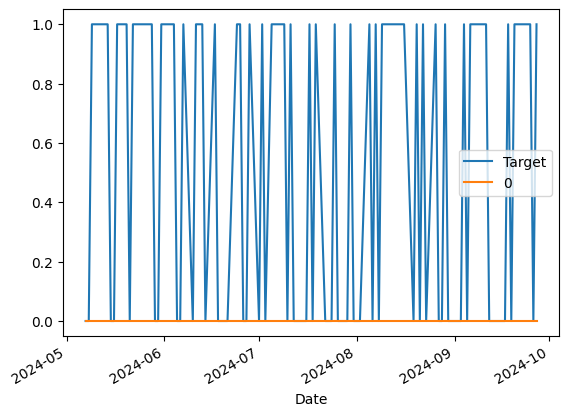

In [12]:
combined.plot()
#We mostly predicted that the market would go up whereas that is not the case

In [13]:
#Building a Backtesting system
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [14]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [15]:
predictions = backtest(NVDA, model, predictors)

In [16]:
predictions["Predictions"].value_counts()

Predictions
0    790
1    419
Name: count, dtype: int64

In [17]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5322195704057279)

In [18]:
#Random Guessing (Market goes up everyday %hit)
predictions["Target"].value_counts() / predictions.shape[0]
#Essentially our algorithm is doing worse than this.

Target
1    0.548387
0    0.451613
Name: count, dtype: float64

In [19]:
#Adding more parameters for more accurate predictions
horizons = [2, 5, 20, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = NVDA.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    NVDA[ratio_column] = NVDA["Close"]/rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    NVDA[trend_column] = NVDA.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]


In [20]:
NVDA = NVDA.dropna()

In [21]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [22]:
#We use 1 for when the model is atleast 60% sure the stock will rise that day.
#By adding more variables for prediction, we make sure to keep market trends as a factor for prediction
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [23]:
predictions = backtest(NVDA, model, new_predictors)

In [24]:
predictions["Predictions"].value_counts()

Predictions
0.0    157
1.0     52
Name: count, dtype: int64

In [25]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5961538461538461)